# 什么是PyTorch？
PyTorch是一个python库，主要提供了两个功能：
1. GPU加速的张量计算
2. 构建在反向自动求导的深度神经网络

## 1.定义数据

In [1]:
import torch

x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
x

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [2]:
y = torch.tensor(666)
y

tensor(666)

In [3]:
z = torch.tensor([1,2,3])
z

tensor([1, 2, 3])

torch支持多种数据类型，创建时也有多种用法，ones，zeros，rand，normal等

In [4]:
x = torch.empty(5,3)
x

tensor([[-7.8761e-26,  1.5723e-42,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [5]:
x = torch.rand(5,3)
x

tensor([[0.0218, 0.4367, 0.5065],
        [0.8254, 0.1015, 0.9661],
        [0.4733, 0.7189, 0.3751],
        [0.7722, 0.3408, 0.8854],
        [0.2250, 0.7164, 0.1170]])

In [6]:
x = torch.zeros(5,3,dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [7]:
y = x.new_ones(5,3)
y

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

In [8]:
z = torch.randn_like(x,dtype=torch.float)
z

tensor([[ 1.1719, -0.6428,  1.2429],
        [-1.1626, -0.2298, -0.7887],
        [-0.6952,  1.0375,  0.8813],
        [-0.6413,  0.1275, -0.7534],
        [-1.1081,  0.4624,  0.8317]])

## 2.定义操作
用tensor进行各种运算，都是Function，包含
1. 基本运算，加减乘除、求幂求余
2. 布尔运算，
3. 线性运算、矩阵乘法，模、行列式等

In [9]:
m =torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(m.size(0), m.size(1), m.size(), sep= ' -- ')

3 -- 3 -- torch.Size([3, 3])


In [10]:
m.numel()

9

In [11]:
m[:,1]

tensor([2, 5, 8])

In [12]:
m[0, :]

tensor([1, 2, 3])

In [13]:
v = torch.arange(1, 4)
v

tensor([1, 2, 3])

In [14]:
m @ v # 矩阵乘法

tensor([14, 32, 50])

In [15]:
m + torch.rand(3,3)

tensor([[1.5489, 2.1858, 3.0299],
        [4.2582, 5.9573, 6.1102],
        [7.7761, 8.8347, 9.5735]])

In [16]:
m.t()

tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

In [17]:
m.transpose(0, 1)

tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

In [18]:
torch.linspace(3, 8, 20)

tensor([3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
        5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
        7.7368, 8.0000])

In [19]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fast')

# Spiral Classsifciation


In [20]:
# import
import random
import math 
import torch
import torch.nn
import torch.optim as optim
from IPython import display
from plot_lib import plot_data, plot_model, set_default
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

初始化随机数种子，神经网络参数在初始时是随机的，而不同的初始值会影响神经网络的性能，当我们德奥一个比较好的结果时，我们希望这是可以复现的，因此，在pytorch中通过设置随机数种子来达到这个目的。

初始化X和Y，X是一个特征矩阵，大小为[NxC, D]，Y是样本标签大小为CxN。

In [22]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)

N = 1000  # 每类样本的数量
D = 2   # 每类样本的特征维度
C = 3   # 样本类别
H = 100     # 隐藏层单元数量

In [23]:
X = torch.zeros(N * C, D).to(device)
Y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    inner_var = torch.linspace((2*math.pi/C) * c, (2 * math.pi / C) * (c + 2), N)
    for ix in range(N * c, N * (c+1)):
        X[ix] = t[index] * torch.FloatTensor((math.sin(inner_var[index]),math.cos(inner_var[index])))
        Y[ix] = c
        index += 1
print('Shapes：')
print(X.size())
print(Y.size())

Shapes：
torch.Size([3000, 2])
torch.Size([3000])


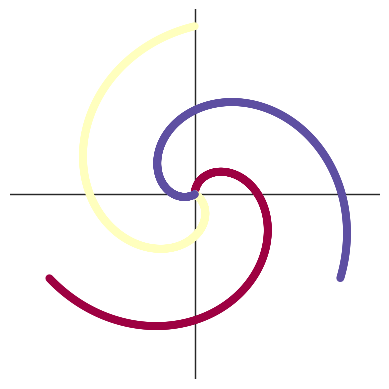

In [24]:
plot_data(X, Y)